## The dataset

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real homes published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive home in the entire dataset?

Let's start with precisely that question... Good luck!


#### Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [22]:
import pandas as pd

df=pd.read_csv('assets/real_estate.csv',sep=';')
#df.info()
#df.head()
#df.tail()
df.sample(5)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
10145,10146,153609500,False,carlos,NaN,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,4.0,250.0,550000,...,0,0,0,0,0,0,"40,40536","-3,89934",NaN,NaN
2447,2448,150129098,False,engel volkers madrid,910758015.0,https://www.fotocasa.es/es/comprar/vivienda/tr...,7.0,8.0,805.0,950000,...,0,0,0,0,0,0,"40,65149","-3,60944",NaN,NaN
13297,13298,153928309,False,inmovital,910753408.0,https://www.fotocasa.es/es/comprar/vivienda/el...,3.0,2.0,114.0,205000,...,0,0,0,0,0,0,"40,24264","-3,70024",NaN,NaN
5619,5620,150580576,False,distrito getafe i,912172393.0,https://www.fotocasa.es/es/comprar/vivienda/na...,3.0,1.0,70.0,124000,...,0,0,0,0,0,0,"40,31594","-3,72034",NaN,NaN
1687,1688,151054948,False,moral homes,912180862.0,https://www.fotocasa.es/vivienda/arganda-del-r...,5.0,3.0,204.0,327500,...,0,0,0,0,0,1,"40,67795","-3,97285",NaN,NaN


#### What is the most expensive home in the dataset? (★☆☆)

In [13]:
max_expensive_home = df.price.max()
max_index = df.price.idxmax()
print('Most expensive Home : '+str(max_expensive_home)+' index : '+str(max_index))

Most expensive Home : 8500000 indice : 13110


#### What is cheapest home in the dataset? (★☆☆)

In [14]:
cheapest_home = df.price.min()
min_index = df.price.idxmin()
print('Cheapest Home : '+str(cheapest_home)+' index : '+str(min_index))

Cheapest Home : 0 indice : 366


#### What is the biggest and the smallest home in the dataset? (★☆☆)

In [19]:
biggest_home = df.surface.max()
big_index = df.surface.idxmax()
smaller_home = df.surface.min()
small_index = df.surface.idxmin()
print('The biggest House has a '+str(biggest_home)+' of surface (index : '+str(big_index)+'), and smaller has a '+str(smaller_home)+' of surface  (index : '+str(small_index)+')')

The biggest House has a 249000.0 of surface (index : 6794), and smaller has a 15.0 of surface  (index : 498)


#### How many populations (level5) the dataset contains? (★☆☆)

In [20]:
#population_level5 = df.level5.count()
population_level5 = df.level5.unique().size
print('The population level5 is : '+str(population_level5))

The population level5 is : 168


#### Does the dataset contain NAs? (★☆☆)


In [12]:
#total_dataset_Nas = df.isnull().sum()
total_dataset_Nas = df.isnull().values.any()
print('The dataset cointains : '+str(total_dataset_Nas)+' NAs')

The dataset cointains : True NAs


#### Delete the NAs of the dataset, if applicable (★★☆)

In [21]:
#df.dropna()
if df.isnull().values.any():
    stripped_df = df.dropna()
    print(stripped_df)
else:
    print(df)

Empty DataFrame
Columns: [Unnamed: 0, id_realEstates, isNew, realEstate_name, phone_realEstate, url_inmueble, rooms, bathrooms, surface, price, date, description, address, country, level1, level2, level3, level4, level5, level6, level7, level8, upperLevel, countryId, level1Id, level2Id, level3Id, level4Id, level5Id, level6Id, level7Id, level8Id, accuracy, latitude, longitude, zipCode, customZone]
Index: []

[0 rows x 37 columns]


#### What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"? (★★☆)

In [23]:
filter_level5 = df[df['level5'] == "Arroyomolinos (Madrid)"]
print('Mean of prices : '+str(filter_level5['price'].mean()))

Mean of prices : 294541.59854014596


#### Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

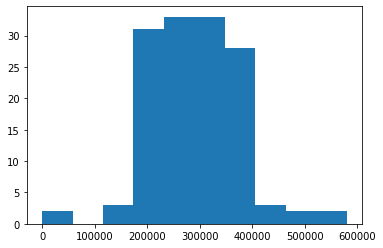

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
filter_level5 = df[df['level5'] == "Arroyomolinos (Madrid)"]
plt.hist(filter_level5['price'])
plt.show()


#### Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆) 

In [25]:
filter_level5 = df[df['level5'].isin(("Fuenlabrada", "Leganés", "Getafe", "Alcorcón"))]
print(filter_level5)

       Unnamed: 0  id_realEstates  isNew  \
1               2       153867863  False   
3               4       152776331  False   
85             86       153152077  False   
94             95       153995577  False   
109           110       153586414  False   
...           ...             ...    ...   
15275       15276       153903887  False   
15291       15292       151697757  False   
15305       15306       153902389  False   
15322       15323       153871864  False   
15325       15326       153901467  False   

                                 realEstate_name  phone_realEstate  \
1              tecnocasa fuenlabrada ferrocarril       916358736.0   
3              tecnocasa fuenlabrada ferrocarril       916358736.0   
85                       sinergical inmobiliaria               NaN   
94                               viviendas365com       911226014.0   
109              area uno asesores inmobiliarios       912664081.0   
...                                          ...   

#### Make a bar plot of the median of prices (★★★) 

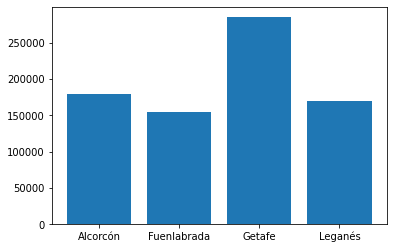

In [26]:

filter_level5 = df[df['level5'].isin(('Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'))]
filtered_data_frame = filter_level5[['level5', 'price']]
grouped_filtered_data_frame = filtered_data_frame.groupby('level5').median()
keys = grouped_filtered_data_frame.index.values.tolist()
values = grouped_filtered_data_frame['price'].tolist()
plt.bar(keys, values)
plt.show()

#### Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (★★★) 

#### What is the most expensive home of each population? (★★☆) 

#### Normalize the variable of prices for each population and plot the 4 histograms in the same plot (★★★) 

#### Make a plot of the coordinates (lat and long) of the south belt of Madrid by color of each population (★★★★) 
This is a extremely hard exercise and we highly recommend to do it at the end of everything

In [ ]:
# Run in console the following command before run the rest of code:
# jupyter nbextension enable --py --sys-prefix ipyleaflet

from ipyleaflet import Map, basemaps

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

In [ ]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:


#### What can you say about the price per square meter between the towns of Getafe and Alcorcón?

#### Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?

#### What happens if we do the same analysis for price/m2 (★★☆) 

#### Could you say there is a relation between surface and price? (★★☆) 
Hint: make a scatter plot.

#### Make the same plot for 4 different populations (level5) and rearrange them on the same graph? (★★☆) 
Hint: make a scatter plot of each population using subplots.

#### How many  real estate agencies the dataset contains? (★★☆) 

#### What is the population (level 5) that contains the most houses? (★★☆) 